This notebook is for exploring how to convert between the 3D dust map and Galactic coordinates

In [7]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

In [2]:
hdul = fits.open('data/cube_ext.fits')

In [3]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  601 / X axis                                         
NAXIS2  =                  601 / Y axis                                         
NAXIS3  =                   81 / Z axis                                         
EXTEND  =                    T                                                  
CREATION= '20211023T195052'    / Data creation date                             
CREATOR = 'EXPLORE (ACRI-ST)'  / Data creator                                   
VERSION = 'v1 (from photometry + GAIA eDR3)'                                    
STEP    =                   10 / gridstep value (parsec)                        
RESOL   =                   25 / Resolution (parsec)                            
UNIT    = 'A0(550nm)/parsec'

In [5]:
data = hdul[0].data
data.shape

(81, 601, 601)

In [12]:
sunpos = np.array((300.5, 300.5, 40.5))
gridstep = 10
datapoint = np.array((400.5, 350.5, 50.5))
cartesian = (datapoint - sunpos) * gridstep
c = SkyCoord(x=cartesian[0], y=cartesian[1], z=cartesian[2], unit='pc', representation_type='cartesian')
print(c.galactic)

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, pc)
    (147.32004573, -55.14353559, 1122.49721603)>


In [19]:
def galactic_coords(x, y, z, sunpos=(300.5, 300.5, 40.5), gridstep=10):
    """
    Convert X, Y, Z position in the data array into Galactic coordinates.
    
    Parameters
    ----------
    x : float or array of floats
        Data x-coordinate
    y : float or array of floats
    z : float or array of floats
    sunpos : 3-tuple, optional
        Position of the sun in data coordinates. The default is (300.5, 300.5, 40.5).
    gridstep : float, optional
        Data grid step size in pc. The default is 10.
        
    Returns
    -------
    l, b, distance : float or array of floats
        Galactic (longitude, latitude, distance) in (deg, deg, pc)
    """
    datapoint = np.array((x, y, z))
    # convert data coordinates to physical cartesian coordinates in pc
    cartesian = (datapoint - np.array(sunpos)) * gridstep
    sc = SkyCoord(w=cartesian[0], u=cartesian[1], v=cartesian[2],
                  unit='pc', frame='galactic', representation_type='cartesian')
    sc.representation_type = 'spherical'
    return sc

In [22]:
galactic_coords(400.5, 300.5, 40.5)

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, pc)
    (0., 90., 1000.)>

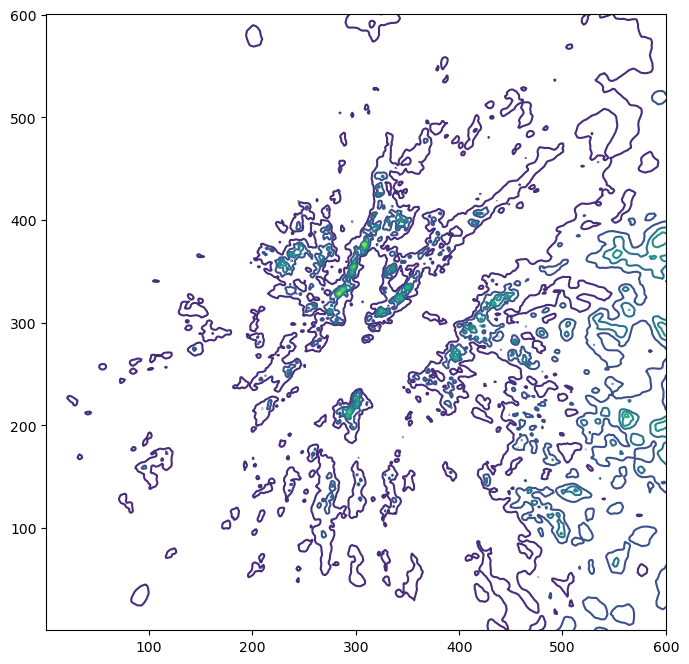

In [36]:
# test plot
flat = np.sum(data, axis=0)
x = np.arange(0, data.shape[2], 1) + 0.5
y = np.arange(0, data.shape[1], 1) + 0.5
xx, yy = np.meshgrid(x, y)
fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(xx, yy, flat)
plt.show()